## Question 1

In [66]:
## load libraries
import sys
from numpy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
%matplotlib inline
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
## 2. Loading the data set: 
data = pd.read_csv("Folds5x2_pp.csv", low_memory=False)  

### Exporatory Data Analysis

In [4]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [54]:
data.shape

(9568, 5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020468CA1AC8>,
      dtype=object)

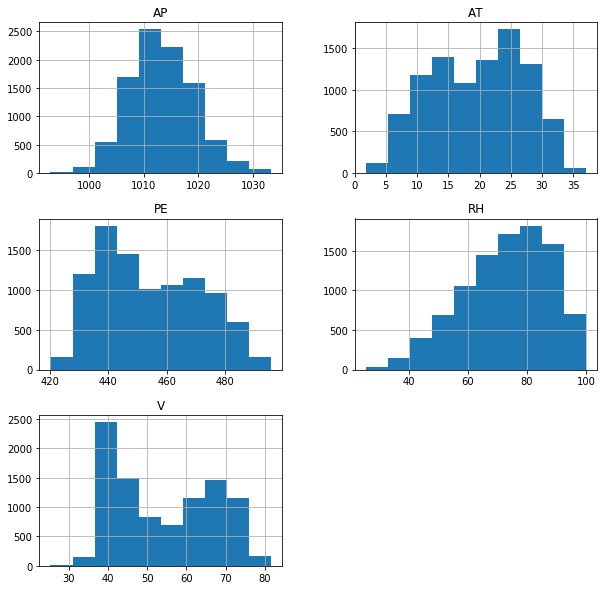

In [87]:
data.hist(figsize=(10,10)) # Showing the distribution of the whole data file

In [69]:
data.columns # Getting the column names from the data

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [71]:
data.describe() # Getting summaries of numerical variables
                #describe() function would provide count, mean, standard deviation (std), min, quartiles and max in its output

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


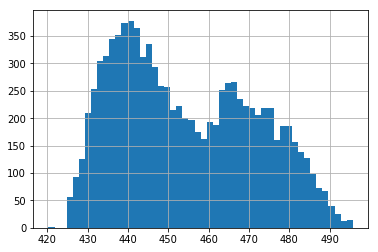

In [73]:
data['PE'].hist(bins=50) # The distribution of Power Output

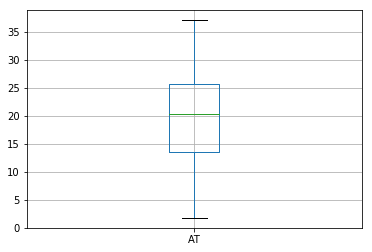

In [75]:
data.boxplot(column='AT') # Boxplot of Atmospheric Temperature in C

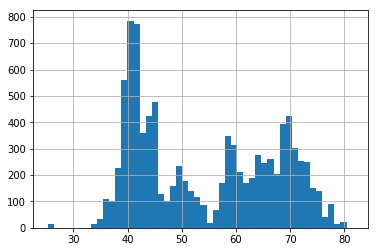

In [83]:
data['V'].hist(bins=50) # The distribution of Exhaust Vacuum Speed

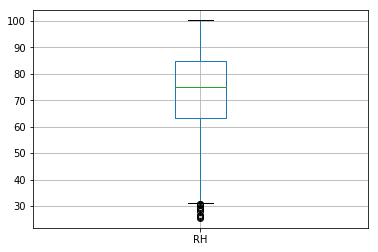

In [84]:
data.boxplot(column='RH') # Boxplot of Relative Humidity

There are outliers with the associated with Relative Humidity

#### Check missing values in the dataset

In [76]:
data.apply(lambda x: sum(x.isnull()),axis=0)

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

There are no missing values with the data set.

### The relationship between the 4 features/variables  and Power Output

Computing pairwise correlation of columns and the correlation matrix is going to be used to come up with the relationship between the given variables

In [86]:
correlation = data.corr(method='pearson') # The pearson method is going to be used to show the level of relationship between the variables 

In [78]:
correlation # The correlation output is going to be used in conjuction with scatter plot to come up with the relationship between the variables and PE being the dependennt variable.

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


### Describing the relationship between the 4 features/variables  and Power Output

### The relationship between Atmospheric Temperature in C and Power Output

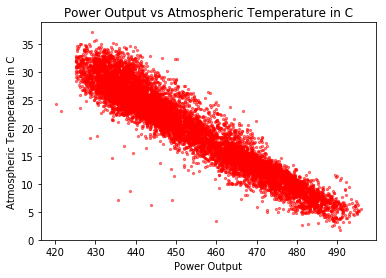

In [85]:
plt.scatter(data.PE, data.AT, s=5, color=(1,0,0), alpha = 0.5)
plt.xlabel('Power Output')
plt.ylabel('Atmospheric Temperature in C')
plt.title('Power Output vs Atmospheric Temperature in C')
plt.show()


There is a perfect downhill (negative) linear correlation of about -0.948128 between Power Output and Atmospheric Temperature in C. The relationship is also shown on the scatter plot given above. This shows that the variables moves together in the same direction and Atmospheric Pressure affects power output.

### The relationship between Exhaust Vacuum Speed  and Power Output

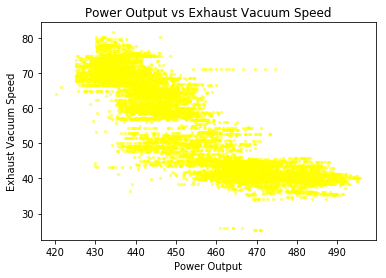

In [46]:
plt.scatter(data.PE, data.V, s=5, color=(1,1,0), alpha = 0.5)
plt.xlabel('Power Output')
plt.ylabel('Exhaust Vacuum Speed')
plt.title('Power Output vs Exhaust Vacuum Speed')
plt.show()

There is a strong downhill (negative) correlationship of -0.869780 between Power Output and Exhaust Vacuum Speed. Which suggest that these two variables move together, exhaust vaccum speed affect power output.

### The relationship between Atmospheric Temperature in C  and Power Output

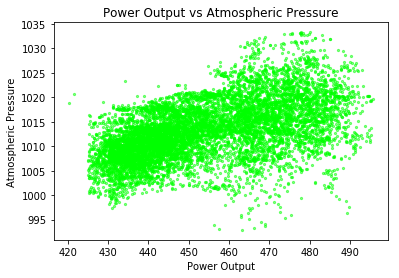

In [48]:
plt.scatter(data.PE, data.AP, s=5, color=(0,1,0), alpha = 0.5)
plt.xlabel('Power Output')
plt.ylabel('Atmospheric Pressure')
plt.title('Power Output vs Atmospheric Pressure')
plt.show()

There is also a moderate downhill linear correlation of 0.518429 between Power Output and Atmospheric Pressure. Atmospheric Pressure does not have a significant effect on power output.

### The relationship between Relative Humidity Speed  and Power Output

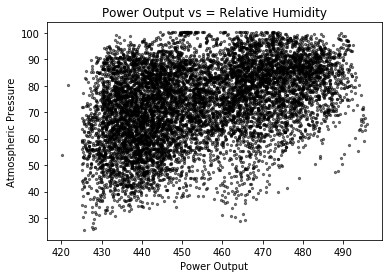

In [50]:
plt.scatter(data.PE, data.RH, s=5, color=(0,0,0), alpha = 0.5)
plt.xlabel('Power Output')
plt.ylabel('Atmospheric Pressure')
plt.title('Power Output vs = Relative Humidity')
plt.show()

There is also a weak uphill (positive) linear relationship correlation of 0.389794 between Power Output and Relative Humidity. Which is a clear indication that Power output is not affected by relative humidity.

## Question 2

#### Fitting a Regression Model to the data set


Linear regression is a common Statistical Data Analysis technique.  It is used to determine the extent to which there is a linear relationship between a dependent variable and one or more independent variables. There are two types of linear regression, simple linear regression and multiple linear regression.

In simple linear regression a single independent variable is used to predict the value of a dependent variable. In multiple linear regression two or more independent variables are used to predict the value of a dependent variable. The difference between the two is the number of independent variables. In both cases there is only a single dependent variable

And in this case multiple linear regression is going to be used to come up with the model using sklearn.

#### Feature Engineering

In [26]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [39]:
y = data['PE'].values    # Predicting power output as a function of envionmental conditions into a Machine Learning task
                         # Defining the dependent variable (This is the value we are trying to predict given the measurements )

In [40]:
y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

In [31]:
y.head(5) # Sampling the first 5 values

0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: PE, dtype: float64

In [36]:
features = ['AT', 'V', 'AP', 'RH']

In [37]:
X = data[features].values # Defining the feature variables that are going to be used in the multiple regression model.



In [38]:
X

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [55]:
# Split the data into training/testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

 #### sklearn.linear_model.LinearRegression

Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.

In [60]:
# Create linear regression object
reg = LinearRegression()


In [62]:
# Train the model using the training sets
# Building a Predictive Model (Multiple Linear Regression)
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
# Make predictions using the testing set
PE_y_pred = reg.predict(X_test)

In [64]:
# The coefficients
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [-1.98589969 -0.23209358  0.06219991 -0.15811779]


In [67]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, PE_y_pred))

Mean squared error: 20.27


In [68]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, PE_y_pred))


Variance score: 0.93


### Hence the formula to  predict PE based on these 4 features/variables given above.

### Conclusion

In predicting the power output of a peaker power plant as a function of the environmental conditions. Atmospheric Temperature in C and Relative Humidity 
do not contribute much in predicting Power Output and can even be dropped from the created model since they are not significant in predicting power output.